Plot the oxygen concentration and the temperatures (from CTD and from optode) measured by the gliders.

In [7]:
import alborexdata
import os
import json
import matplotlib.pyplot as plt
import cmocean
import numpy as np
from importlib import reload
plt.rcParams.update({'font.size': 14})

In [24]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexdata.py'>

In [8]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Configuration

In [9]:
with open('alborexconfig.json') as json_data_file:
    config = json.load(json_data_file)

In [10]:
figdir = config["figdir"]

### Gliders

In [25]:
glider1 = alborexdata.Glider()
glider1.get_from_netcdf(config["datafiles"]["gliders"][0])

In [26]:
glider2 = alborexdata.Glider()
glider2.get_from_netcdf(config["datafiles"]["gliders"][1])

# Plots
## Oxygen concentration

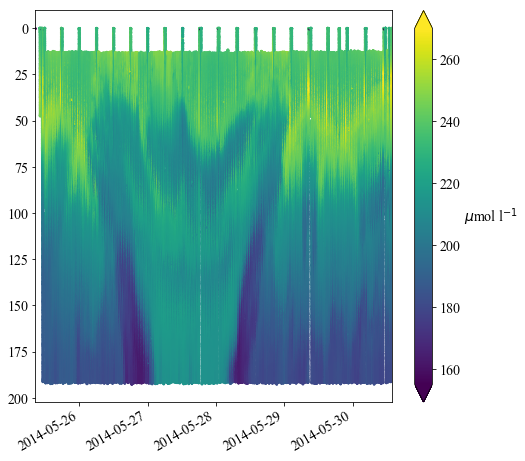

In [16]:
fig = plt.figure(figsize=(8, 8))
NN = -1
plt.scatter(glider1.dates[:NN], glider1.depth[:NN], c=glider1.oxygen[:NN], s=3,
           vmin=155., vmax=270.)
plt.gca().invert_yaxis()
plt.xlim(glider1.dates[0], glider1.dates[NN])
cb = plt.colorbar(extend="both")
cb.set_label("$\mu$mol l$^{-1}$", rotation=0, ha="left", fontsize=14)
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "oxygen_concentration.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### 2nd version
Using the colormap and limites suggested in [`cmocean`](https://matplotlib.org/cmocean/).

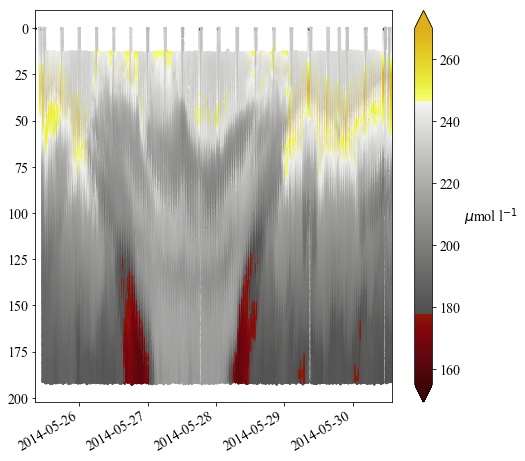

In [18]:
fig = plt.figure(figsize=(8, 8))
NN = -1
plt.scatter(glider1.dates[:NN], glider1.depth[:NN], c=glider1.oxygen[:NN], s=3,
           vmin=155., vmax=270., cmap=cmocean.cm.oxy)
plt.gca().invert_yaxis()
plt.xlim(glider1.dates[0], glider1.dates[NN])
cb = plt.colorbar(extend="both")
cb.set_label("$\mu$mol l$^{-1}$", rotation=0, ha="left", fontsize=14)
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "oxygen_concentration_cmocean.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Two temperatures 
Recorded by the CTD and by the optode.     
We also read the thermal-lag corrected temperature.

In [27]:
glider1.get_temperature_all(config["datafiles"]["gliders"][0])

### Scatter plot
We limit the plot to the first *NN* measurements:

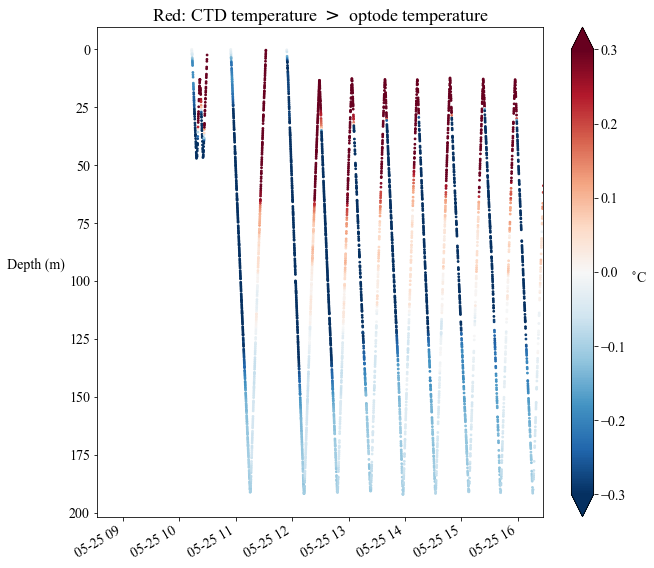

In [35]:
fig = plt.figure(figsize=(10, 10))
NN = 20000
plt.scatter(glider1.dates[:NN], glider1.depth[:NN], 
            c=glider1.temp_corr[:NN]-glider1.temp_oxy[:NN], s=3,
            cmap=plt.cm.RdBu_r, vmin=-0.3, vmax=0.3)
plt.gca().invert_yaxis()
plt.xlim(glider1.dates[0], glider1.dates[NN])
cb = plt.colorbar(extend="both")
cb.set_label("$^{\circ}$C", rotation=0, ha="left")
plt.title("Red: CTD temperature $>$ optode temperature", fontsize=18)
plt.ylabel("Depth (m)", rotation=0, ha="right")
fig.autofmt_xdate()
plt.show()
plt.close()

### Temperature time series

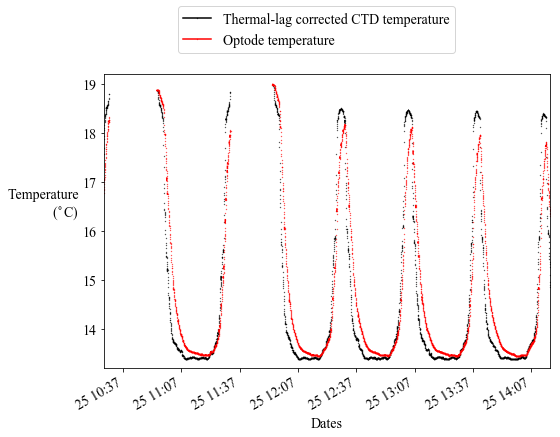

In [38]:
NN = 12000
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
plt.plot(glider1.dates[:NN], glider1.temp_corr[:NN], "ko-", 
         ms=.3, label="Thermal-lag corrected CTD temperature")
plt.plot(glider1.dates[:NN], glider1.temp_oxy[:NN], "ro-", 
         ms=.3, label="Optode temperature")
plt.xlim(glider1.dates[1000], glider1.dates[NN])
plt.ylim(13.2, 19.2)
ax.legend(bbox_to_anchor=(.15, 1.05))
plt.xlabel("Dates")
plt.ylabel("Temperature\n($^{\circ}$C)", rotation=0, ha="right")
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "temperatures_glider.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### Temperature difference time series

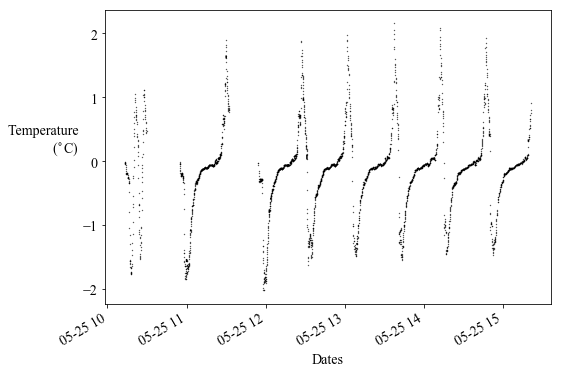

In [39]:
NN = 16000
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
plt.plot(glider1.dates[:NN], glider1.temp_corr[:NN]-glider1.temp_oxy[:NN], 
         "ko-", ms=.3, label="Thermal-lag corrected CTD temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature\n($^{\circ}$C)", rotation=0, ha="right")
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "temperatures_diff_glider.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()